<a href="https://colab.research.google.com/github/PhuocPhat19146046/PhuocPhat19146046/blob/main/inverse_kinematic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pxy=[]
angle=[]
for i in range(0,360,1):
  for j in range(0,180,1):
    for k in [0,30,45,60]:
      pxy.append([50*np.cos(i*np.pi/180)+40*np.cos((i+j)*np.pi/180)+20*np.cos((i+j)*np.pi/180),
                  50*np.sin(i*np.pi/180)+40*np.sin((i+j)*np.pi/180)+20*np.sin((i+j)*np.pi/180)])
      angle.append([i,j,k-i-j])
x = pd.DataFrame(np.c_[pxy],columns=['Px','Py'])
y = pd.DataFrame(np.c_[angle],columns=['tt1','tt2','tt3'])    
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,shuffle=True)

In [ ]:
from tensorflow.keras.optimizers import  SGD
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Dense(512,kernel_initializer='normal',activation='relu',input_shape=(2,)))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dense(3))
model.compile(optimizer=RMSprop(),loss='mse',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
1458/1458 [==============================] - 12s 8ms/step - loss: 5620.0513 - accuracy: 0.8225 - val_loss: 1843.4857 - val_accuracy: 0.9087
Epoch 2/10
1458/1458 [==============================] - 12s 8ms/step - loss: 2035.9039 - accuracy: 0.9207 - val_loss: 1621.4281 - val_accuracy: 0.9423
Epoch 3/10
1458/1458 [==============================] - 13s 9ms/step - loss: 1656.6090 - accuracy: 0.9379 - val_loss: 1186.9852 - val_accuracy: 0.9401
Epoch 4/10
1458/1458 [==============================] - 15s 11ms/step - loss: 1438.2075 - accuracy: 0.9424 - val_loss: 1125.2679 - val_accuracy: 0.9584
Epoch 5/10
1458/1458 [==============================] - 11s 8ms/step - loss: 1331.9814 - accuracy: 0.9455 - val_loss: 1122.2611 - val_accuracy: 0.9606
Epoch 6/10
1458/1458 [==============================] - 14s 10ms/step - loss: 1238.2523 - accuracy: 0.9482 - val_loss: 1714.0991 - val_accuracy: 0.9441
Epoch 7/10
1458/1458 [==============================] - 10s 7ms/step - loss: 1151.3636 - acc

In [ ]:
model.save('drive/MyDrive/Colab Notebooks/model/inverse_3.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_1=load_model('drive/MyDrive/Colab Notebooks/model/inverse_3.h5')

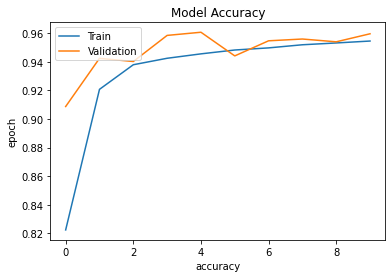

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
model_1.predict(x_test)

array([[ 275.59607 ,  111.22991 , -352.64383 ],
       [ 360.09628 ,  100.038   , -421.0445  ],
       [  87.17614 ,   68.53786 , -121.211136],
       ...,
       [  88.12936 ,  129.77515 , -186.13173 ],
       [ 113.16103 ,   59.283844, -140.23723 ],
       [ 244.59325 ,  127.17422 , -339.07166 ]], dtype=float32)

In [ ]:
y_test

,tt1,tt2,tt3
186913,259,108,-337
250218,347,94,-396
57143,79,65,-84
5645,7,151,-128
169983,236,15,-191
...,...,...,...
37697,52,64,-86
21464,29,146,-175
61734,85,133,-173
75857,105,64,-139
